In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

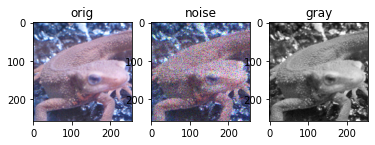

In [2]:
img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 3, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

## Q.11 平滑化フィルタ, Smoothing filter
ノイズ画像に対して、平滑化フィルタ(5x5)をかけよ。

平滑化フィルタはフィルタ内の画素の平均値を出力するフィルタである。
```python
# opencv
img_smoth = cv2.blur(img_noise, (5, 5)) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth)
plt.show()

```

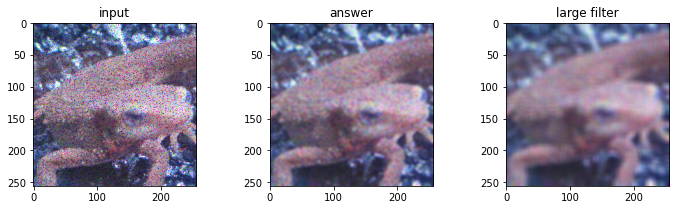

In [3]:
def filter_smooth(img, ksize):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = _img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], "edge")
    out = np.zeros_like(_img)
    pad_h, pad_w = out.shape[:2]
    ch = 1 if len(_img.shape) == 2 else _img.shape[2]
    
    # filering
    for i in range(pad_h - ksize_h):
        for j in range(pad_w - ksize_w):
            for c in range(ch):
                out[i, j, c] = np.mean(_img[i:i+ksize_h, j:j+ksize_w, c])
    out = out[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

def q11():
    img_smooth = filter_smooth(img_noise, (5, 5))
    img_smooth_large = filter_smooth(img_noise, (10, 10))
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_noise)
    plt.subplot(1, 3, 2); plt.title('answer'); plt.imshow(img_smooth)
    plt.subplot(1, 3, 3); plt.title('large filter'); plt.imshow(img_smooth_large)
    plt.show()
q11()

## Q.12 モーションフィルタ, Motion filter
モーションフィルタ(5x5)を実装せよ。

モーションフィルタとは対角方向の平均値を取るフィルタであり、k x kのフィルタは次式で定義される。

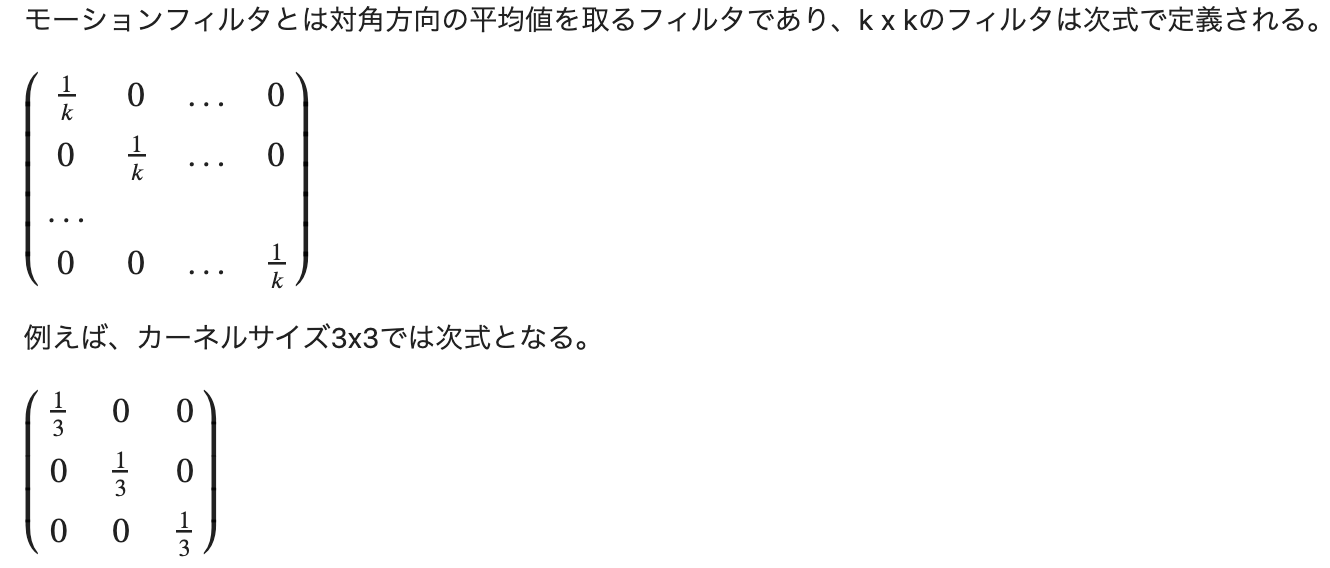

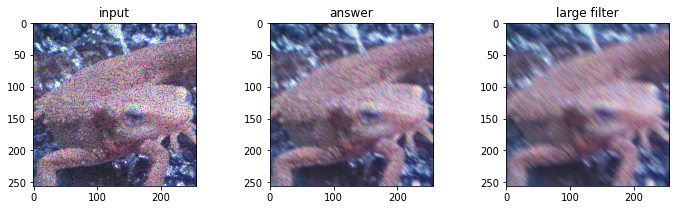

In [4]:
def filter_motion(img, ksize):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    assert ksize_h == ksize_w
    
    # padding
    h, w = _img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], "edge")
    out = np.zeros_like(_img)
    pad_h, pad_w = out.shape[:2]
    ch = 1 if len(_img.shape) == 2 else _img.shape[2]
    kernel = np.eye(ksize_h) / ksize_h
    # filering
    for i in range(pad_h - ksize_h):
        for j in range(pad_w - ksize_w):
            for c in range(ch):
                out[i, j, c] = np.sum(_img[i:i+ksize_h, j:j+ksize_w, c] * kernel)

    out = out[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)
def q12():
    img_motion = filter_motion(img_noise, (5, 5))
    img_motion_large = filter_motion(img_noise, (10, 10))
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_noise)
    plt.subplot(1, 3, 2); plt.title('answer'); plt.imshow(img_motion)
    plt.subplot(1, 3, 3); plt.title('large filter'); plt.imshow(img_motion_large)
    plt.show()
q12()

## Q.13 Max-Minフィルタ, Max-Min filter
グレースケールに対してMAX-MINフィルタ(3x3)を実装せよ。

MAX-MINフィルタとはフィルタ内の画素の最大値と最小値の差を出力するフィルタであり、エッジ検出のフィルタの一つである。

エッジ検出とは画像内の線を検出るすることであり、このような画像内の情報を抜き出す操作を特徴抽出と呼ぶ。

エッジ検出では多くの場合、グレースケール画像に対してフィルタリングを行う。

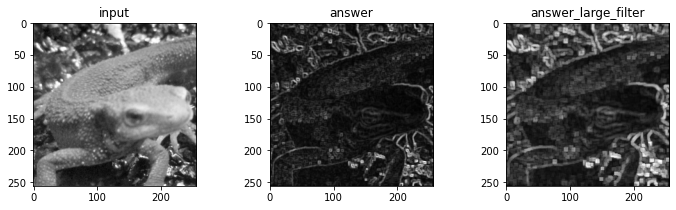

In [5]:
def filter_minmax(img, ksize):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    assert ksize_h == ksize_w
    
    # padding
    h, w = _img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right)], "edge")
    out = np.zeros_like(_img)
    pad_h, pad_w = out.shape[:2]

    kernel = np.eye(ksize_h) / ksize_h
    # filering
    for i in range(pad_h - ksize_h):
        for j in range(pad_w - ksize_w):
            out[i, j] += np.max(_img[i:i+ksize_h, j:j+ksize_w])
            out[i, j] -= np.min(_img[i:i+ksize_h, j:j+ksize_w])
                    

    out = out[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

def q13():
    img_minmax = filter_minmax(img_gray, (3, 3))
    img_minmax_large = filter_minmax(img_gray, (5, 5))
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_gray, cmap="gray")
    plt.subplot(1, 3, 2); plt.title('answer'); plt.imshow(img_minmax, cmap="gray")
    plt.subplot(1, 3, 3); plt.title('answer_large_filter'); plt.imshow(img_minmax_large, cmap="gray")
    plt.show()
q13()

## Q.14. 微分フィルタ, Differential filter
グレースケールに対して、微分フィルタ(3x3)を実装せよ。

微分フィルタは輝度の急激な変化が起こっている部分のエッジを取り出すフィルタであり、隣り合う画素同士の差を取る。赤線のR成分を取り出すと輪郭や、目の境目など色が変わる部分でR値が急激に変化している。この部分がエッジとなる。
```python
_w = img_orig.shape[1]
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.plot(np.arange(_w), [150] * _w, color='red')
plt.subplot(1, 3, 2); plt.plot(np.arange(_w), img_orig[150, :, 0])
plt.show()
```
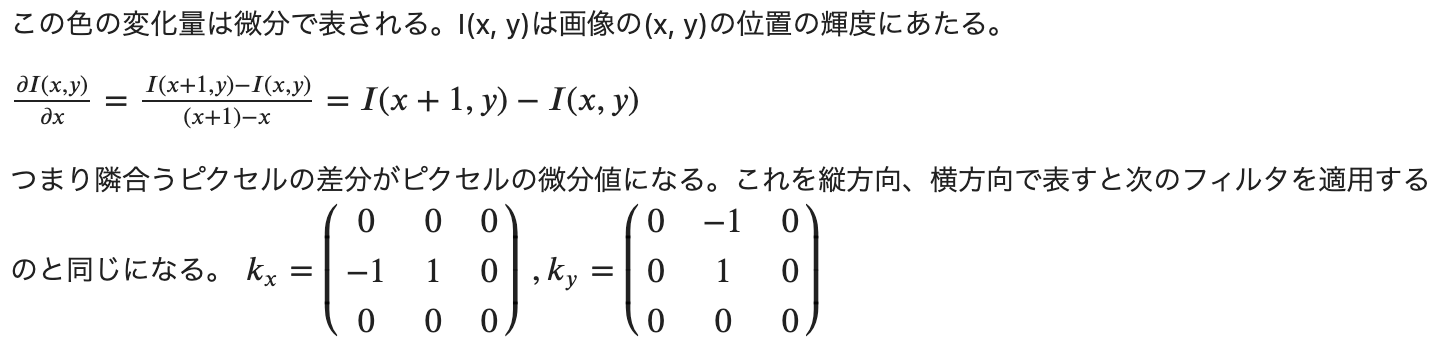

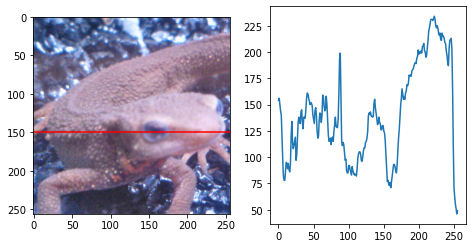

<Figure size 432x288 with 0 Axes>

In [6]:
_w = img_orig.shape[1]
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.plot(np.arange(_w), [150] * _w, color='red')
plt.subplot(1, 3, 2); plt.plot(np.arange(_w), img_orig[150, :, 0])
plt.show()
plt.clf()

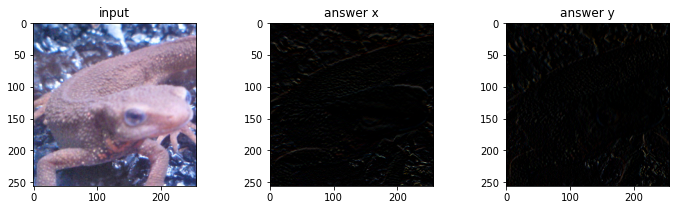

In [7]:
def filter_diff(img, mode):
    if mode == "x":
        kernel = np.array([
            [0, -1, 0],
            [0, 1, 0],
            [0, 0, 0]
        ])
    # mode:=yを転置したフィルタ
    elif mode == "y":
        kernel = np.array([
            [0, 0, 0],
            [-1, 1, 0],
            [0, 0, 0]
        ])
    # 解説AC cv2.filter2Dを知らなかった
    return cv2.filter2D(img, -1, kernel)

def q14():
    img_diff_x = filter_diff(img_orig, "x")
    img_diff_y = filter_diff(img_orig, "y")
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
    plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_diff_x, cmap='gray')
    plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_diff_y, cmap='gray')
    plt.show()
q14()

## Q.15. プリューウィットフィルタ, Prewitt filter
グレースケールに対して、Prewittフィルタ(5x5)を実装せよ。

Prewitt(プレウィット)フィルタはエッジ抽出フィルタの一種であり、カーネルサイズk x kでは次式で定義される。

__多分Sobel fiterの単純なやつ__
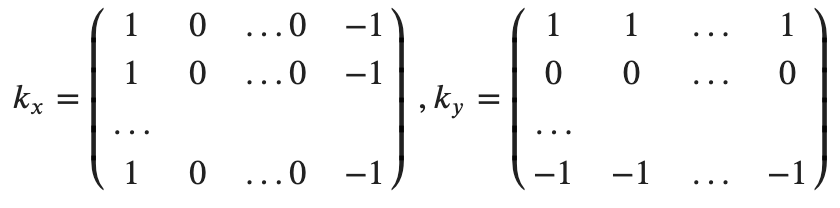

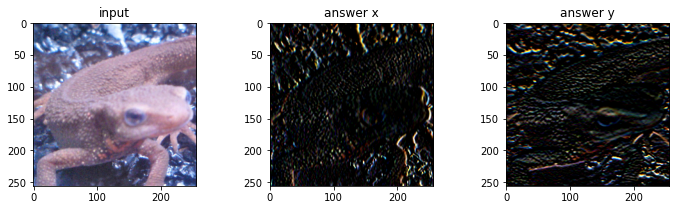

In [8]:
def filter_prewitt(img, ksize, mode):
    kernel = np.zeros(ksize)
    if mode == "x":
        kernel[:, 0] = 1
        kernel[:, -1] = -1
    # mode:=yを転置したフィルタ
    elif mode == "y":
        kernel[0, :] = 1
        kernel[-1, :] = -1
    # 解説AC cv2.filter2Dを知らなかった
    return cv2.filter2D(img, -1, kernel)

def q15():
    img_prewitt_x = filter_prewitt(img_orig, (3, 3), "x")
    img_prewitt_y = filter_prewitt(img_orig, (3, 3), "y")
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
    plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_prewitt_x, cmap='gray')
    plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_prewitt_y, cmap='gray')
    plt.show()
q15()

## Q.16. ソーベルフィルタ, Sobel filter
グレースケール に対して、Sobelフィルタ(3x3)を実装せよ。

Sobelフィルタもエッジを抽出するフィルタであり、次式でそれぞれ定義される。 これはprewittフィルタの中心部分に重みをつけたフィルタである。

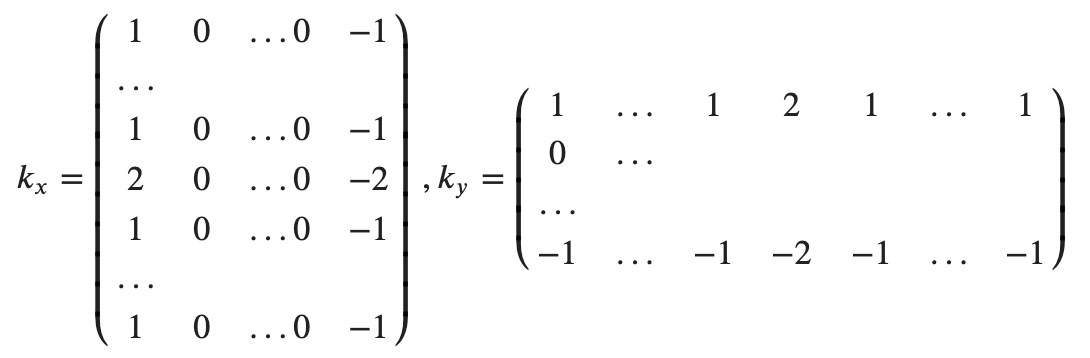

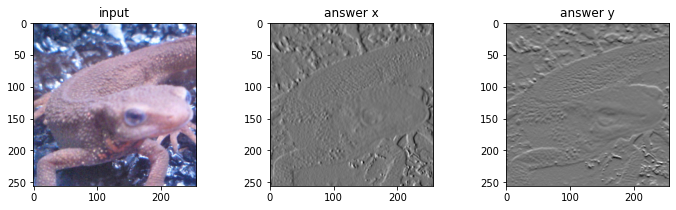

In [9]:
def editional_q16():
    # opencv
    img_sobel_x = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)
    img_sobel_x -= img_sobel_x.min()  # normalize > [0, 1]
    img_sobel_x /= img_sobel_x.max()
    img_sobel_y = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)
    img_sobel_y -= img_sobel_y.min()  # normalize > [0, 1]
    img_sobel_y /= img_sobel_y.max()

    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
    plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_sobel_x, cmap='gray')
    plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_sobel_y, cmap='gray')
    plt.show()
editional_q16()

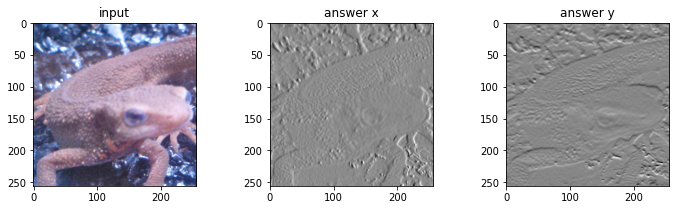

In [10]:
def filter_sobel(img, ksize, mode):
    kernel = np.zeros(ksize, dtype=np.float32)
    if mode == "x":
        kernel[:, 0] = 1
        kernel[:, -1] = -1
        kernel[ksize[0]//2, 0] = 2
        kernel[ksize[0]//2, -1] = -2
    # mode:=yを転置したフィルタ
    elif mode == "y":
        kernel[0, :] = 1
        kernel[-1, :] = -1
        kernel[0, ksize[0]//2] = 2
        kernel[-1, ksize[0]//2] = -2
    # 解説AC cv2.filter2Dを知らなかった
    out = cv2.filter2D(img.astype(np.float32), -1, kernel)
    # normalize [0, 1]
    out -= out.min()
    out /= out.max()
    return out
    

def q16():
    img_sobel_x = filter_sobel(img_gray, (3, 3), "x")
    img_sobel_y = filter_sobel(img_gray, (3, 3), "y")

    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
    plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_sobel_x, cmap='gray')
    plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_sobel_y, cmap='gray')
    plt.show()
q16()

## Q.17. ラプラシアンフィルタ, Laplacian filter
グレースケールに対して、Laplacianフィルタを実装せよ。

Laplacianフィルタとは輝度の二次微分をとることでエッジ検出を行うフィルタである。
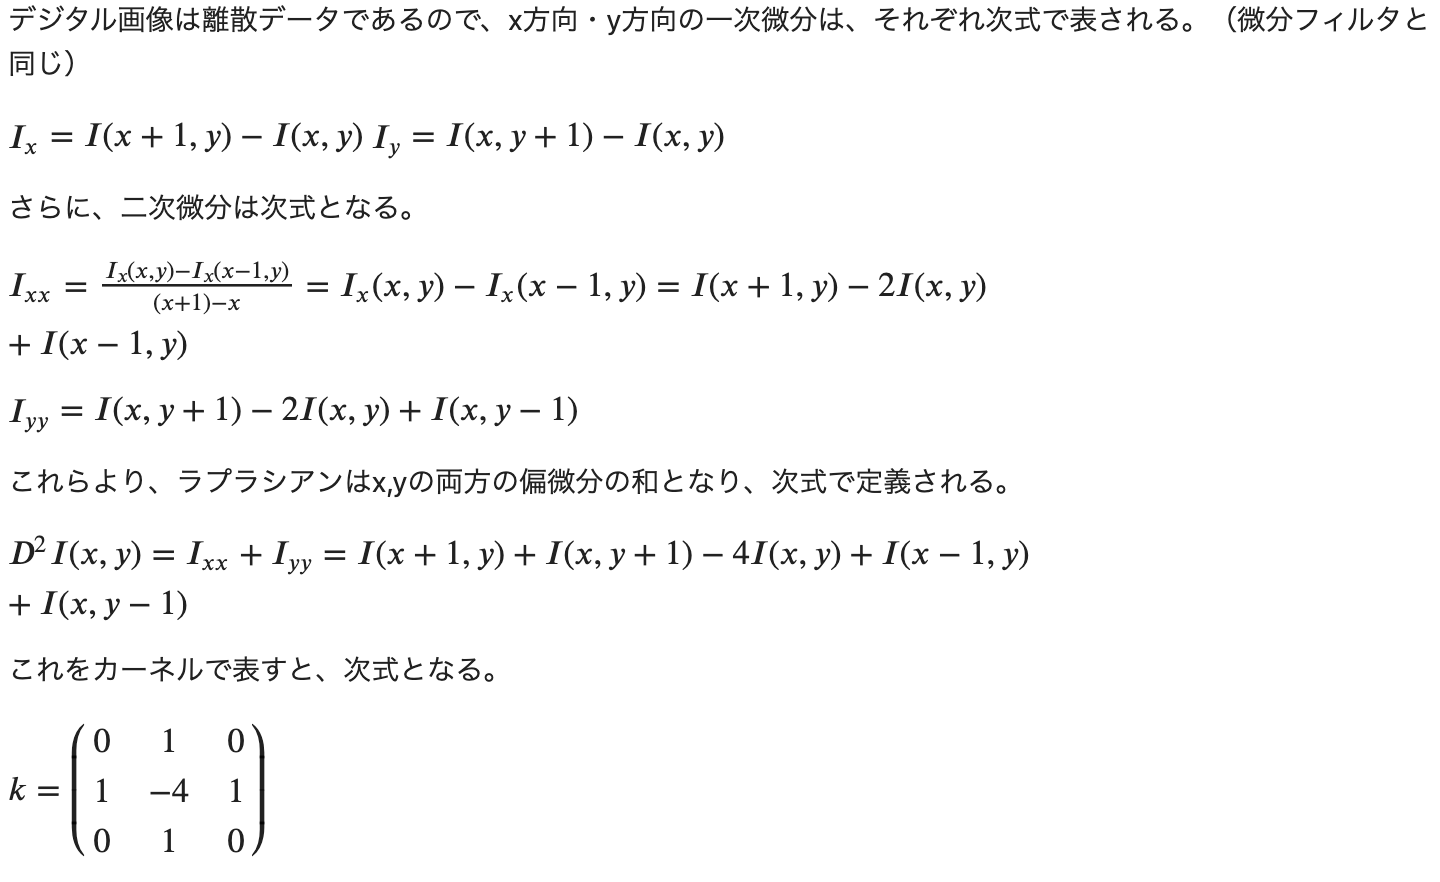

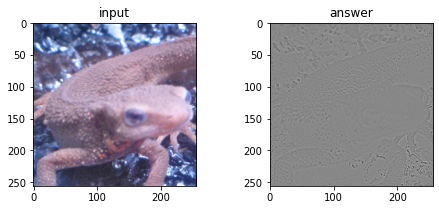

In [11]:
def filter_laplacian(img):
    kernel = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])
    out = cv2.filter2D(img.astype(np.float32), -1, kernel)
    # noarmalize [0, 1]
    out -= out.min()
    out /= out.max()
    return out

def q17():
    img_laplacian = filter_laplacian(img_gray)
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
    plt.subplot(1, 3, 2); plt.title('answer'); plt.imshow(img_laplacian, cmap='gray')
    plt.show()
q17()

## Q.18. エンボスフィルタ, Emboss filter
グレースケールに対して、Embossフィルタを実装せよ。

Embossフィルタとは輪郭部分を浮き出しにするフィルタで、次式で定義される。
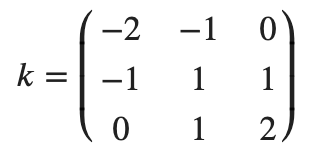

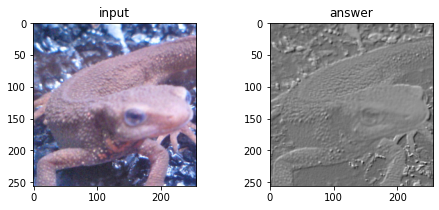

In [12]:
def filter_emboss(img):
    kernel = np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ])
    out = cv2.filter2D(img.astype(np.float32), -1, kernel)
    # noarmalize [0, 1]
    out -= out.min()
    out /= out.max()
    return out

def q18():
    img_emboss = filter_emboss(img_gray)
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
    plt.subplot(1, 3, 2); plt.title('answer'); plt.imshow(img_emboss, cmap='gray')
    plt.show()
q18()

## Q.19. LoGフィルタ, LoG filter
LoGフィルタ(sigma=3、カーネルサイズ=5)を実装し、imori_noise_256x256.pngのエッジを検出せよ。

LoGフィルタとはLaplacian of Gaussianであり、ガウシアンフィルタで画像を平滑化した後にラプラシアンフィルタで輪郭を取り出すフィルタである。

Laplcianフィルタは二次微分をとるのでノイズが強調されるのを防ぐために、予めGaussianフィルタでノイズを抑える。LoGフィルタは次式で定義される。
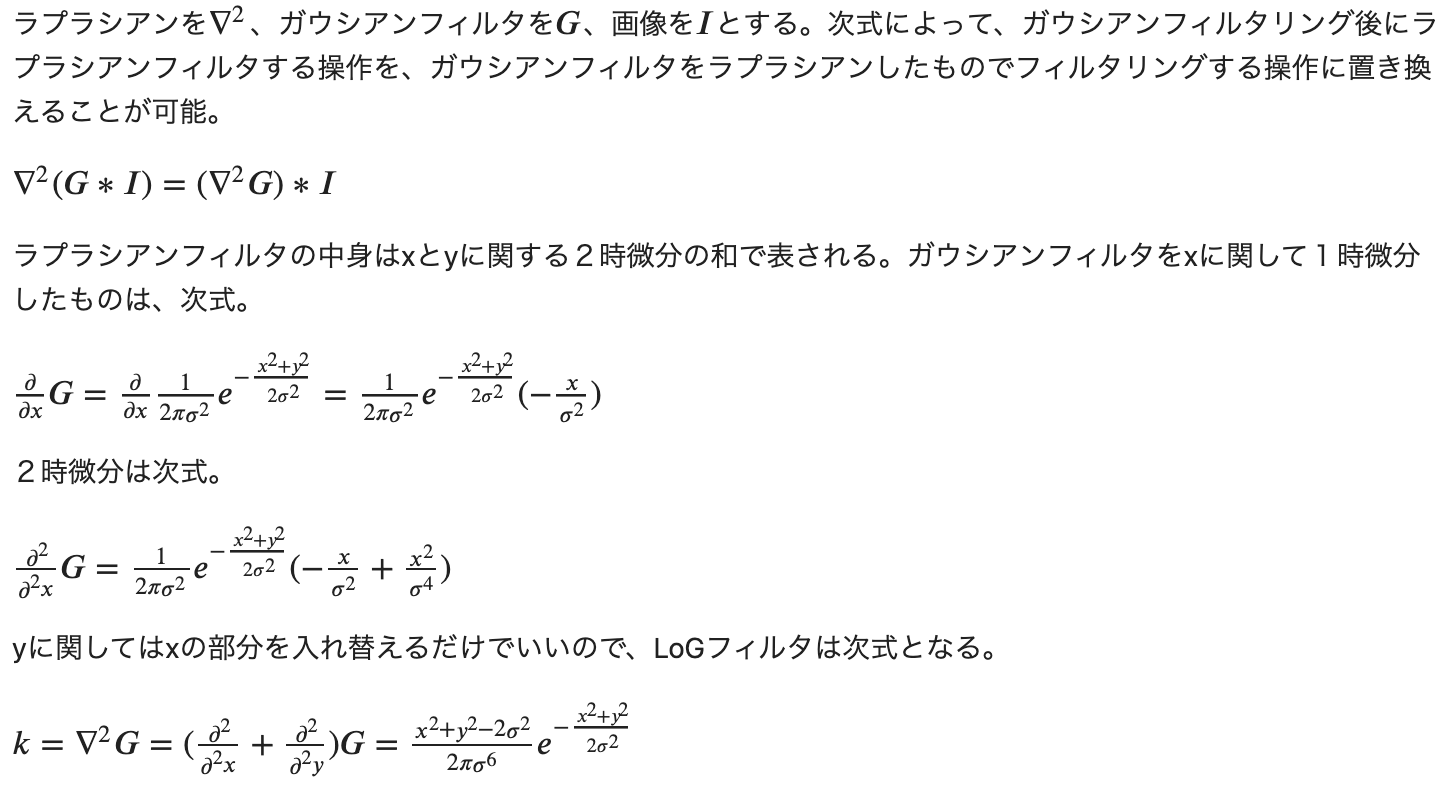

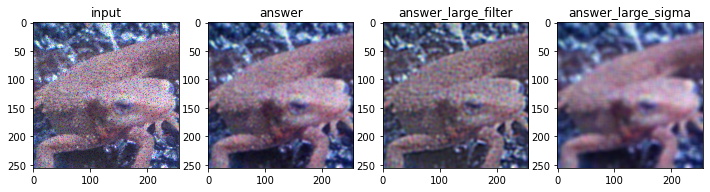

In [13]:
def filter_LoG(img, ksize, sigma):
    kernel = np.zeros(ksize, dtype=np.float32)
    pad_x = ksize[0] // 2
    pad_y = ksize[1] // 2
    for i in range(-pad_y, -pad_y + ksize[1]):
        for j in range(-pad_x, -pad_x + ksize[0]):
            kernel[i+pad_y, j+pad_x] = (i**2 + j**2 - 2*sigma**2) / (2 * np.pi * sigma**6) * np.exp(-(i ** 2 + j ** 2)/(2 * sigma**2)) 
    kernel /= np.sum(kernel)
    out = cv2.filter2D(img.astype(np.float32), -1, kernel)
    out -= out.min()
    out /= out.max()
    return out
def q19():
    img_log = filter_LoG(img_noise, ksize=(5, 5), sigma=3)
    img_log2 = filter_LoG(img_noise, ksize=(12, 12), sigma=3)
    img_log3 = filter_LoG(img_noise, ksize=(9, 9), sigma=9)

    plt.figure(figsize=(12, 7))
    plt.subplot(1, 4, 1); plt.title('input'); plt.imshow(img_noise, cmap='gray')
    plt.subplot(1, 4, 2); plt.title('answer'); plt.imshow(img_log, cmap='gray')
    plt.subplot(1, 4, 3); plt.title('answer_large_filter'); plt.imshow(img_log2, cmap='gray')
    plt.subplot(1, 4, 4); plt.title('answer_large_sigma'); plt.imshow(img_log3, cmap='gray')
    plt.show()
q19()

## Q19-appendix Gaussian + Laplacianとの比較


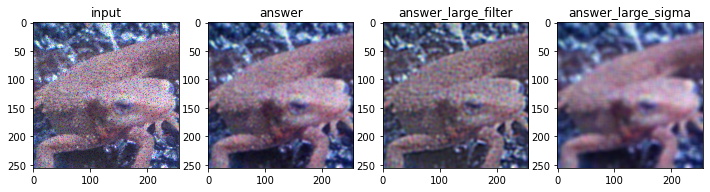

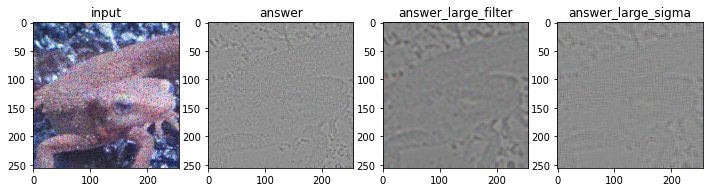

In [14]:
def GaussianBlur(img, ksize=(3,3), sigma=1.3):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    # padding
    h, w = _img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    ch = 1 if len(_img.shape) == 2 else _img.shape[2]
    # [(axis=0のpad), (axis=1のpad), (axis=2のpad)]
    # mode="edge"で端からpaddingする
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], mode="edge")
    out = np.zeros_like(_img)
    nh, nw = out.shape[:2]
    # kernelの作成
    k = np.zeros(ksize)
    for i in range(ksize_h):
        for j in range(ksize_w):
            k[i, j] = 1 / (2 * np.pi * sigma**2) * np.exp(-((i - ksize_h//2)**2 + (j - ksize_w//2)**2) / (2 * sigma**2))
    k /= k.sum()
    # フィルタリング
    for i in range(nh - ksize_h):
        for j in range(nw - ksize_w):
            for c in range(ch):
                out[i, j, c] = np.sum(_img[i:i+ksize_h, j:j+ksize_w, c] * k)
    out = out[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

def filter_LoG2(img, ksize, sigma):
    img_gaussian = GaussianBlur(img, ksize, sigma)
    out = filter_laplacian(img_gaussian)
    return out
    

def q19_appendix():
    img_log = filter_LoG2(img_noise, ksize=(5, 5), sigma=3)
    img_log2 = filter_LoG2(img_noise, ksize=(12, 12), sigma=3)
    img_log3 = filter_LoG2(img_noise, ksize=(9, 9), sigma=9)

    plt.figure(figsize=(12, 7))
    plt.subplot(1, 4, 1); plt.title('input'); plt.imshow(img_noise, cmap='gray')
    plt.subplot(1, 4, 2); plt.title('answer'); plt.imshow(img_log, cmap='gray')
    plt.subplot(1, 4, 3); plt.title('answer_large_filter'); plt.imshow(img_log2, cmap='gray')
    plt.subplot(1, 4, 4); plt.title('answer_large_sigma'); plt.imshow(img_log3, cmap='gray')
    plt.show()
q19()
q19_appendix()

## Q.20. ヒストグラム表示
matplotlibを用いてimori_256x256_dark.pngのヒストグラムを表示せよ。

ヒストグラムとは画素の出現回数をグラフにしたものである。 matplotlibではhist()という関数がすでにあるので、それを利用する。

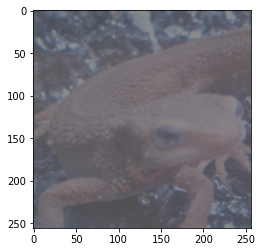

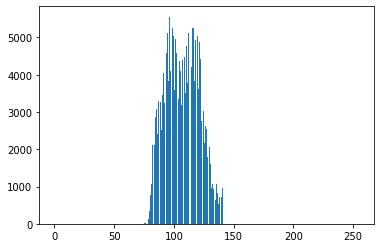

In [15]:
def q20():
    img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_dark.png')
    plt.imshow(img_dark); plt.show()
    plt.hist(img_dark.reshape(-1, 1), bins=255, rwidth=0.8, range=(0, 255))
    plt.show()
q20()